# Stock Exchange Data Analysis


## Import Libraries


In [159]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso


## Data Cleaning

### Load the Data

In [160]:
# Load the stock data and check whether it has been loaded correctly.
data = pd.read_csv(
    "data/index_data.csv",
    on_bad_lines="error",
)
print("Data Info Overview:")
data.info()


Data Info Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


### Convert Date Column to Datetime

In [161]:
data["Date"] = pd.to_datetime(data["Date"])
print("Data Info Overview After Date Type Conversion:")
data.info()


Data Info Overview After Date Type Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      112457 non-null  object        
 1   Date       112457 non-null  datetime64[ns]
 2   Open       110253 non-null  float64       
 3   High       110253 non-null  float64       
 4   Low        110253 non-null  float64       
 5   Close      110253 non-null  float64       
 6   Adj Close  110253 non-null  float64       
 7   Volume     110253 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.9+ MB


### Remove Incomplete Rows

In [162]:
# Count how many missing values are in each column.
print("Number of Missing Values Per Column:")
display(data.isnull().sum())

# Remove rows with missing values.
data.dropna(axis=0, how="any", inplace=True)

# Check that the missing values have been removed.
print("Number of Missing Values Per Column After Cleaning:")
display(data.isnull().sum())


Number of Missing Values Per Column:


Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

Number of Missing Values Per Column After Cleaning:


Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Exploration


### Calculate Distribution of Attributes

In [163]:
data.describe()

Open           High            Low          Close  \
count  110253.000000  110253.000000  110253.000000  110253.000000   
mean     7658.515222    7704.372961    7608.000422    7657.545872   
std      9011.478913    9066.638548    8954.506981    9011.510444   
min        54.869999      54.869999      54.869999      54.869999   
25%      1855.030029    1864.510010    1843.979980    1855.060059   
50%      5194.089844    5226.279785    5154.049805    5194.750000   
75%     10134.299810   10207.820310   10060.349610   10134.830080   
max     68775.062500   69403.750000   68516.992190   68775.062500   

           Adj Close        Volume  
count  110253.000000  1.102530e+05  
mean     7657.351729  1.273975e+09  
std      9011.608900  4.315783e+09  
min        54.869999  0.000000e+00  
25%      1854.179565  0.000000e+00  
50%      5194.750000  4.329000e+05  
75%     10134.830080  1.734314e+08  
max     68775.062500  9.440374e+10

### Filter the Data

In [164]:
print("\nData After Removing Columns:")
# Restrict analysis to focus on the adjusted close price of each index per day.
data = data[["Date", "Index", "Adj Close"]]
display(data)



Data After Removing Columns:


Date Index    Adj Close
0      1965-12-31   NYA   528.690002
1      1966-01-03   NYA   527.210022
2      1966-01-04   NYA   527.840027
3      1966-01-05   NYA   531.119995
4      1966-01-06   NYA   532.070007
...           ...   ...          ...
112452 2021-05-27  N100  1247.069946
112453 2021-05-28  N100  1256.599976
112454 2021-05-31  N100  1248.930054
112455 2021-06-01  N100  1258.579956
112456 2021-06-02  N100  1263.619995

[110253 rows x 3 columns]

### Split the Data by Index


In [165]:
# Split the data set by 'Index' column.
data_frames_per_index = {
    key: data.loc[value] for key, value in data.groupby("Index").groups.items()
}

# Show how many rows of data are available for each index.
print("Sample Size Per Index:")
for index, data_frame in data_frames_per_index.items():
    print(f"{index}: {len(data_frame)}")


Sample Size Per Index:
000001.SS: 5791
399001.SZ: 5760
GDAXI: 8438
GSPTSE: 10526
HSI: 8492
IXIC: 12690
J203.JO: 2346
KS11: 6029
N100: 5474
N225: 13874
NSEI: 3346
NYA: 13947
SSMI: 7671
TWII: 5869


## Feature Engineering


### Calculate Simple Moving Averages


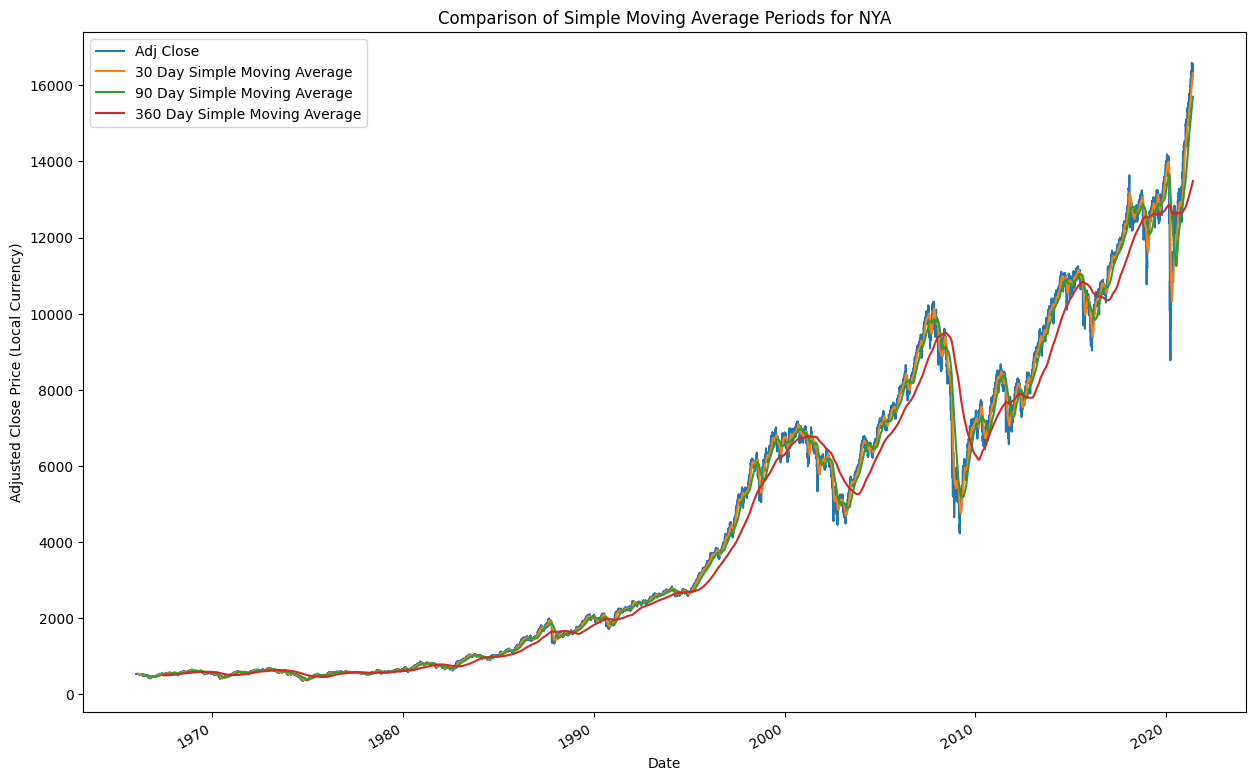

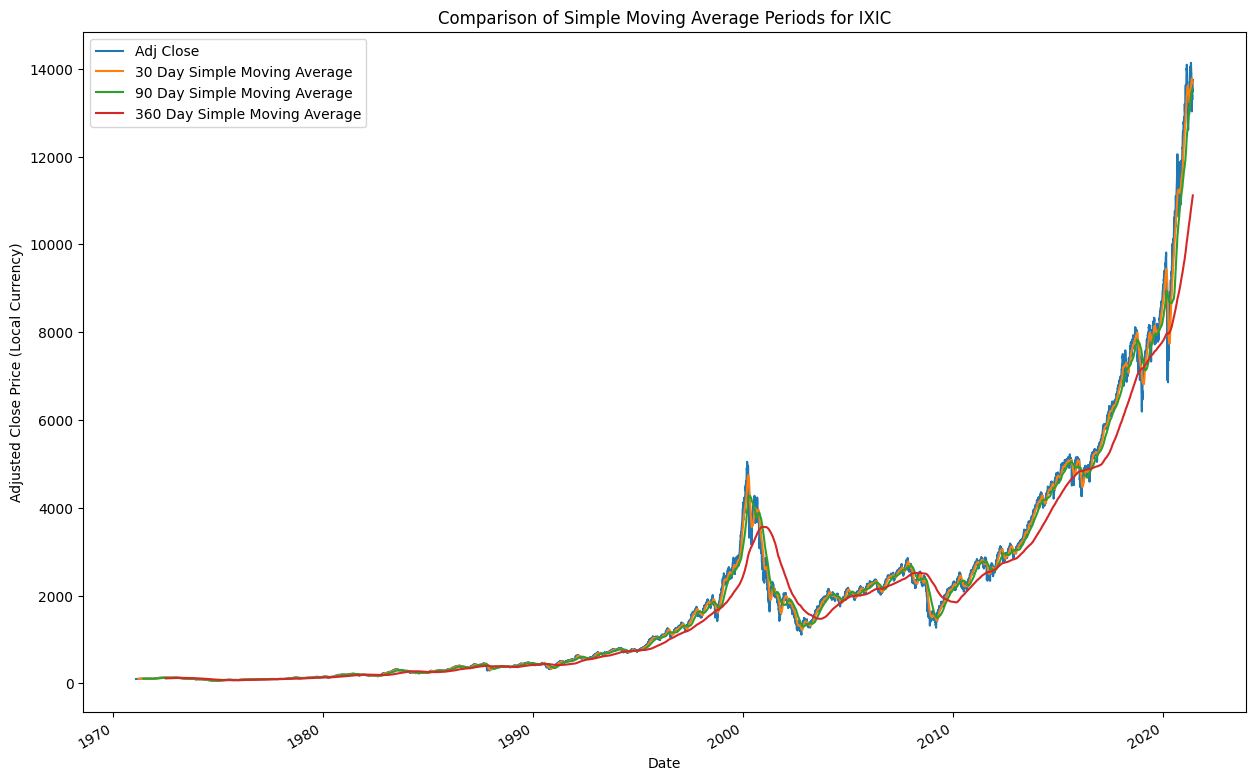

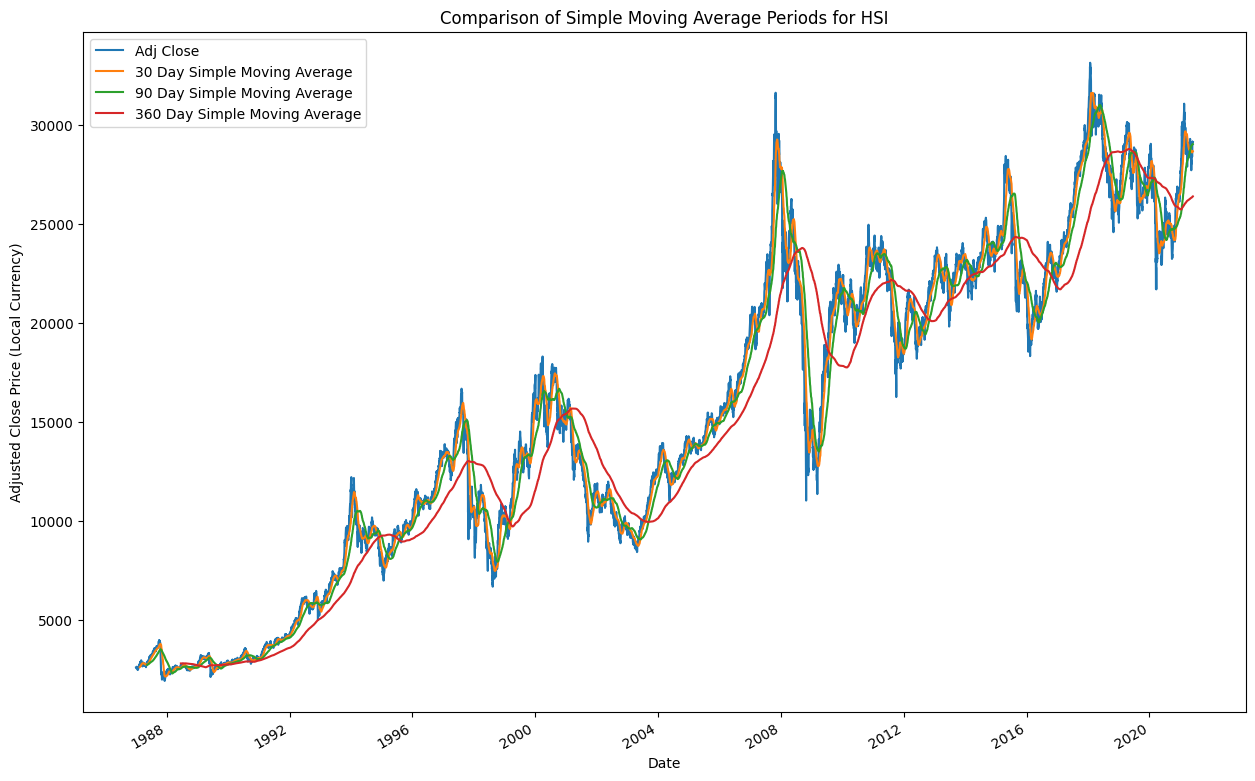

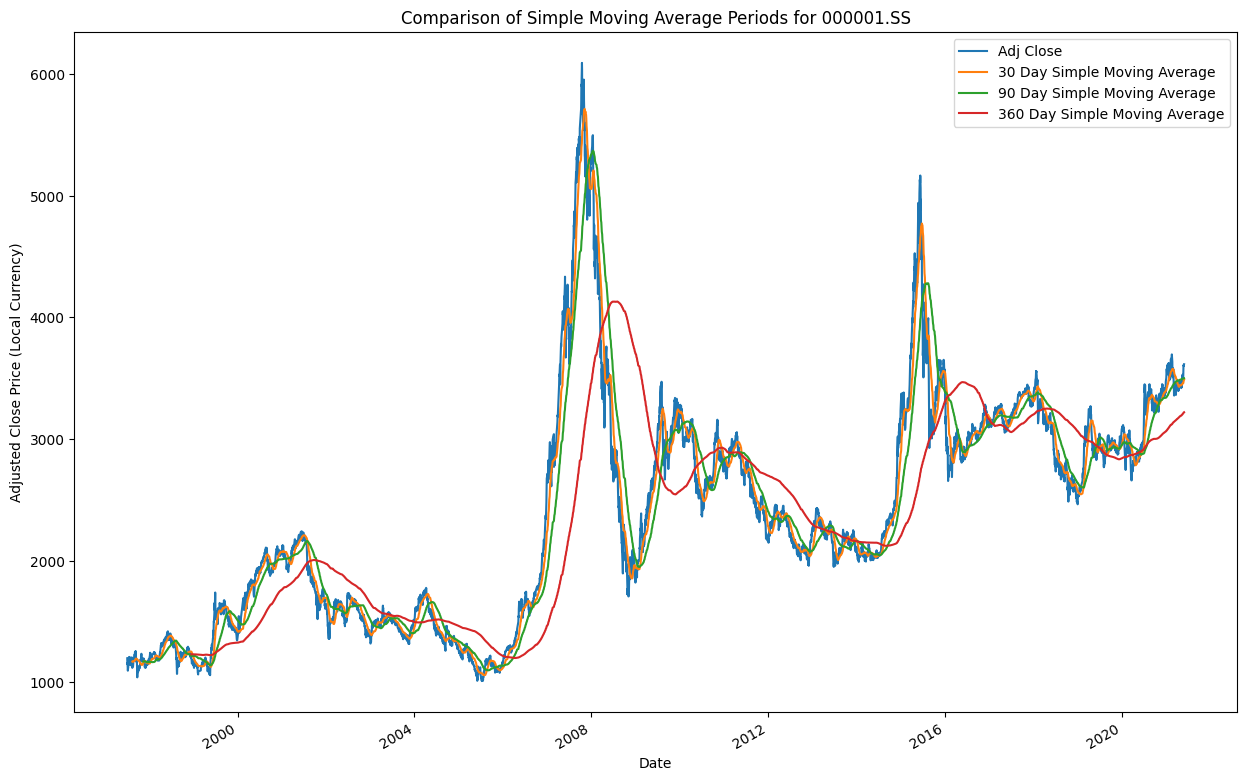

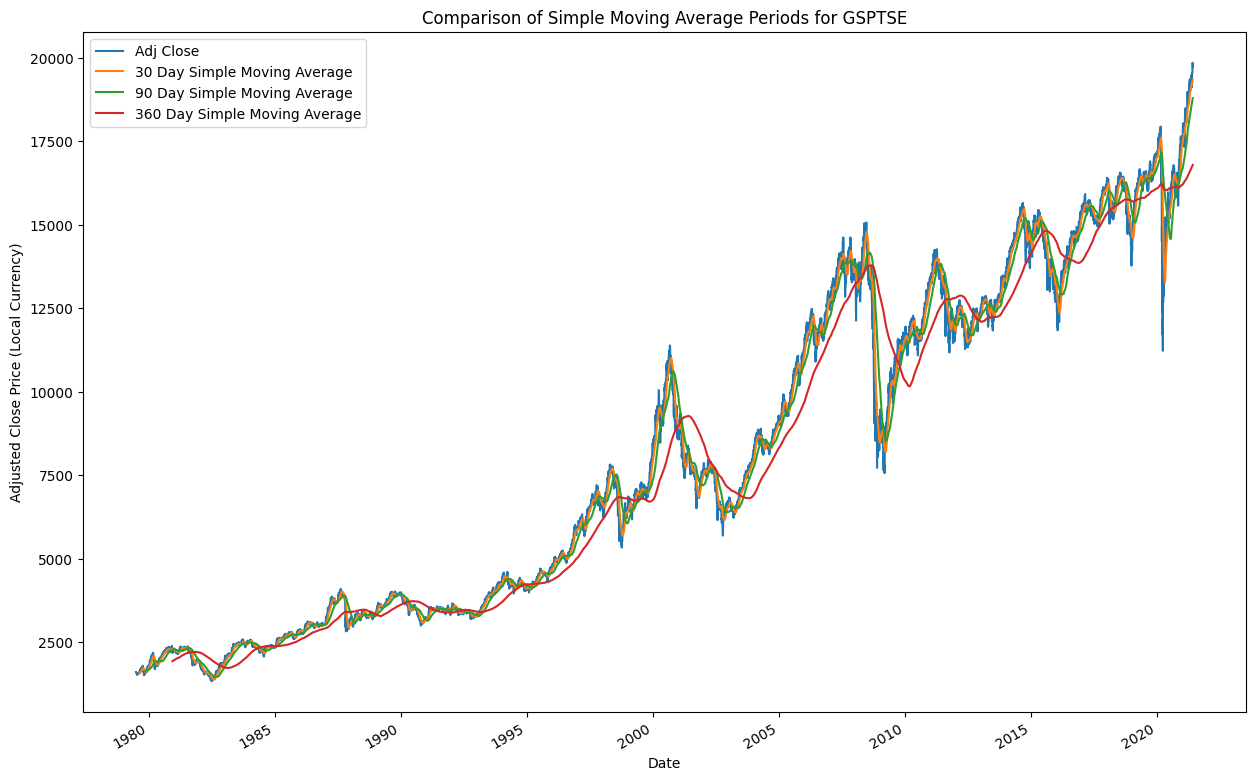

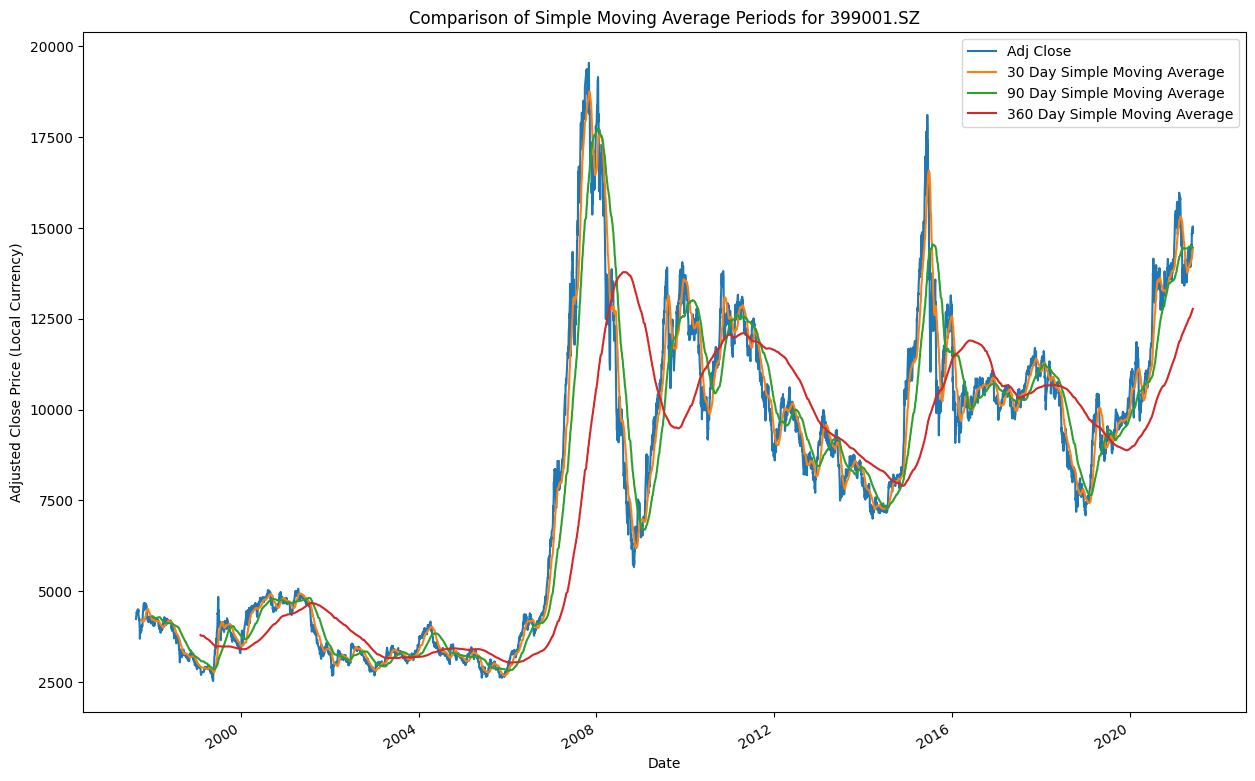

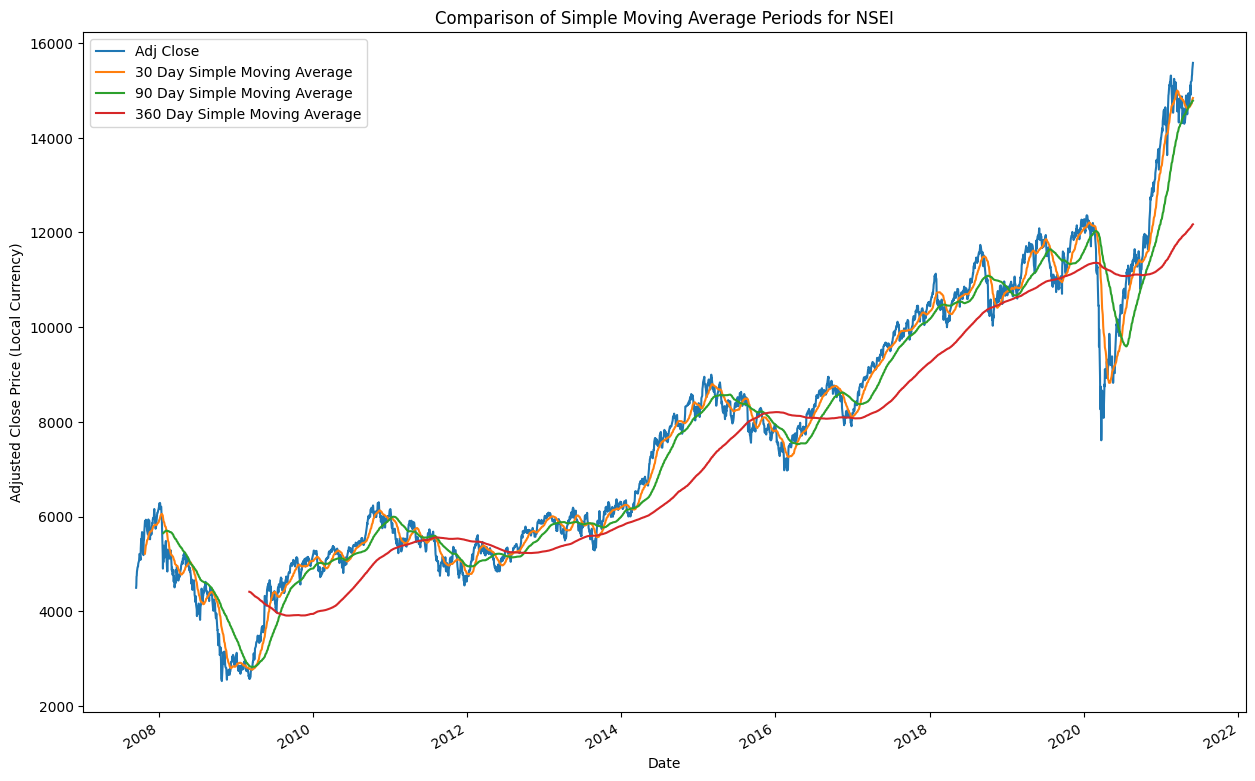

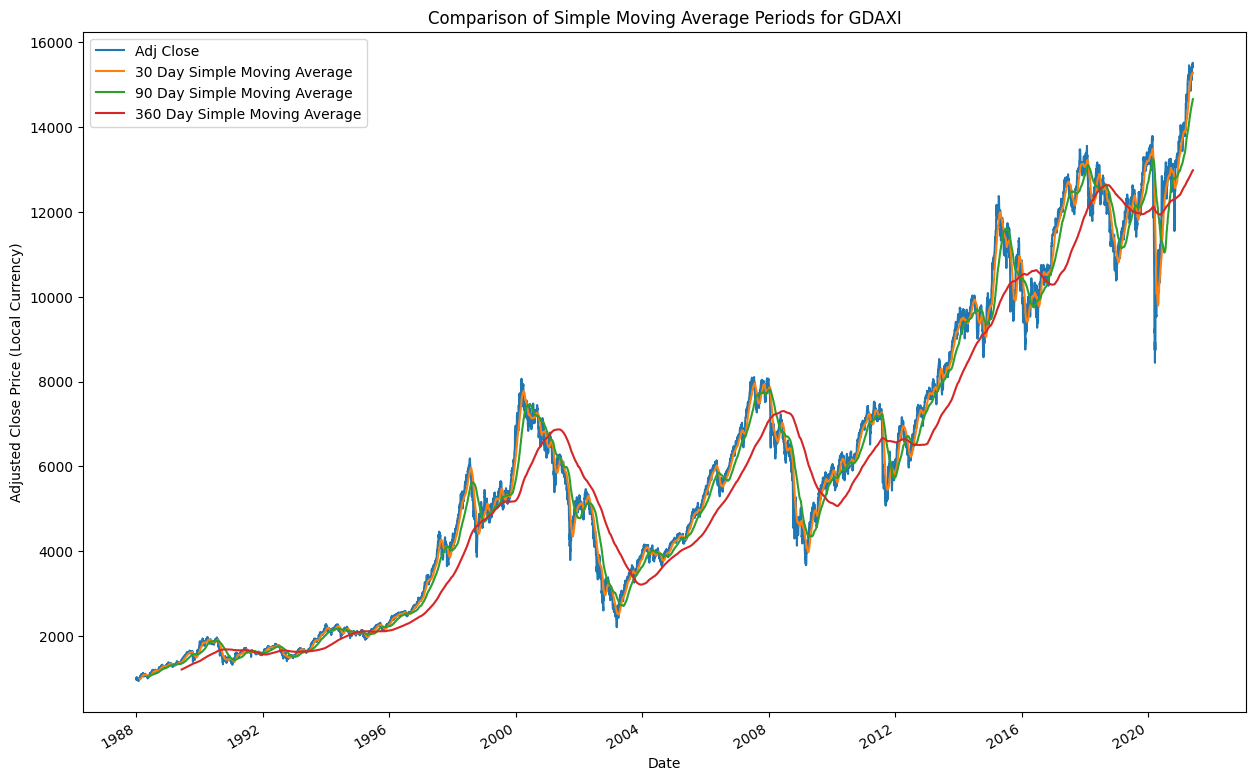

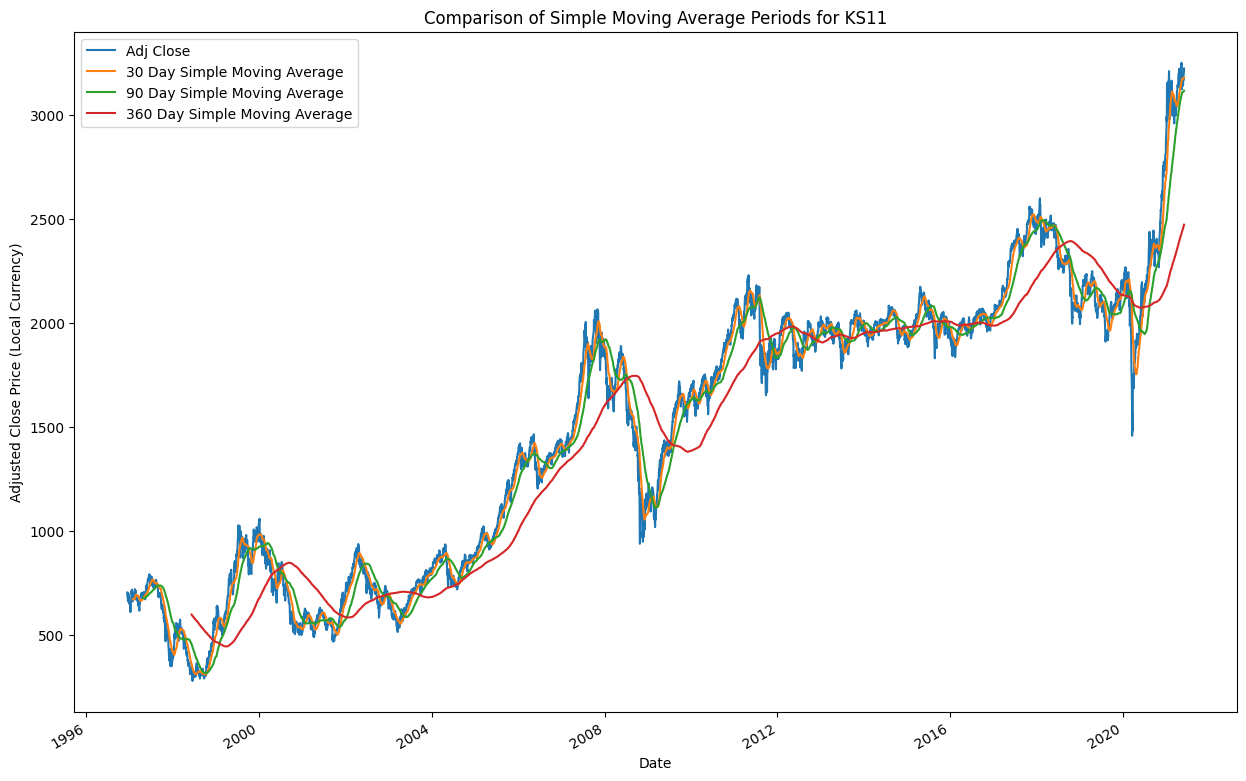

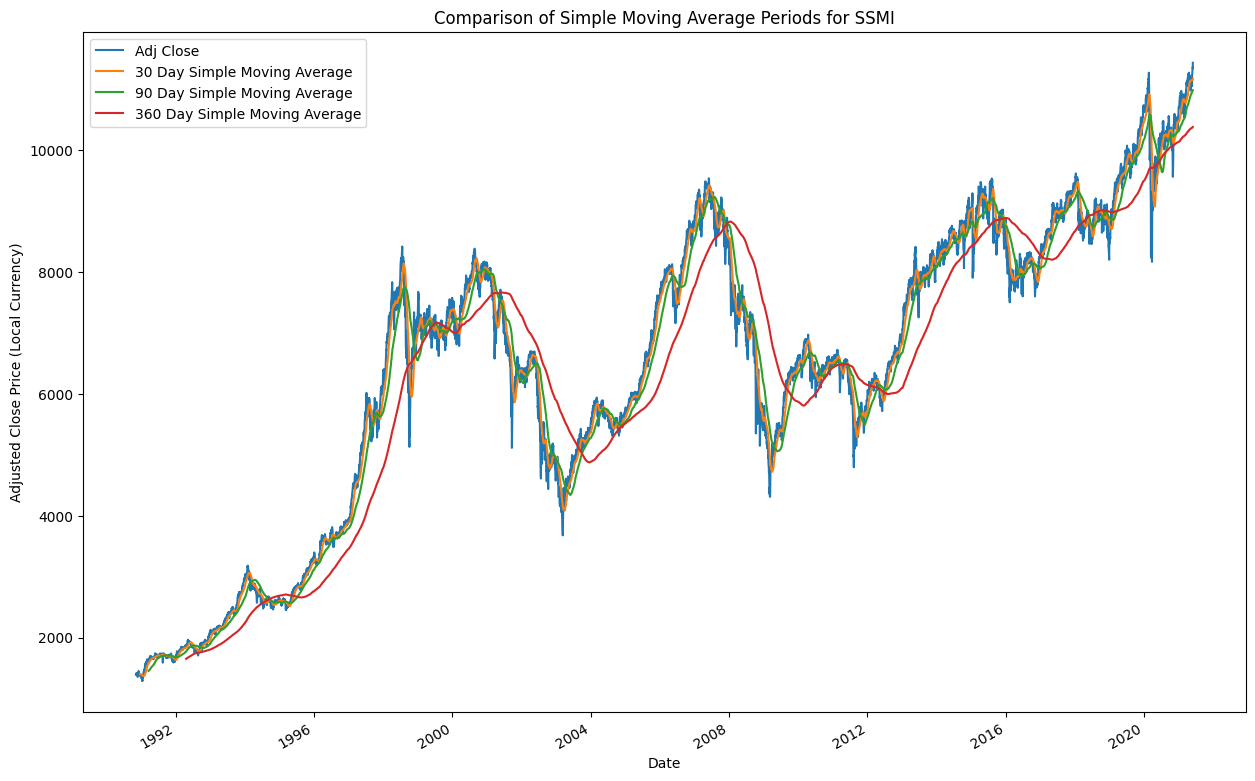

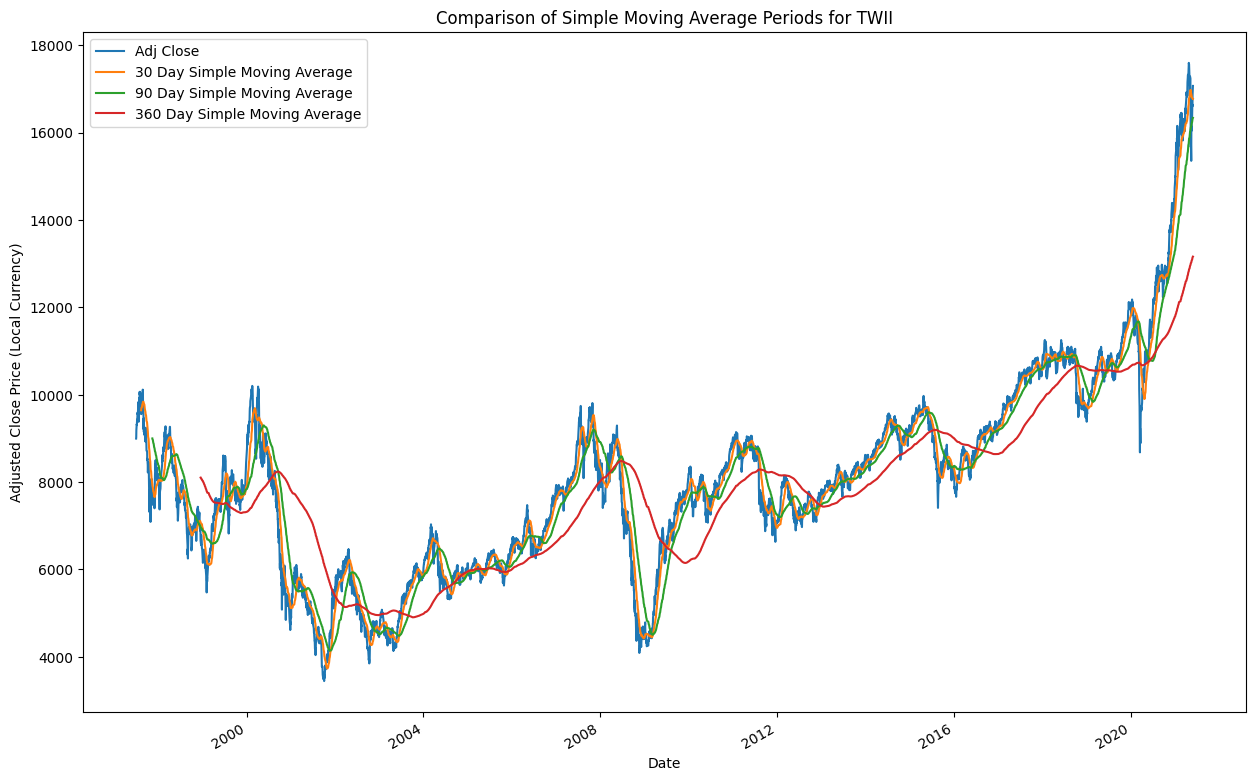

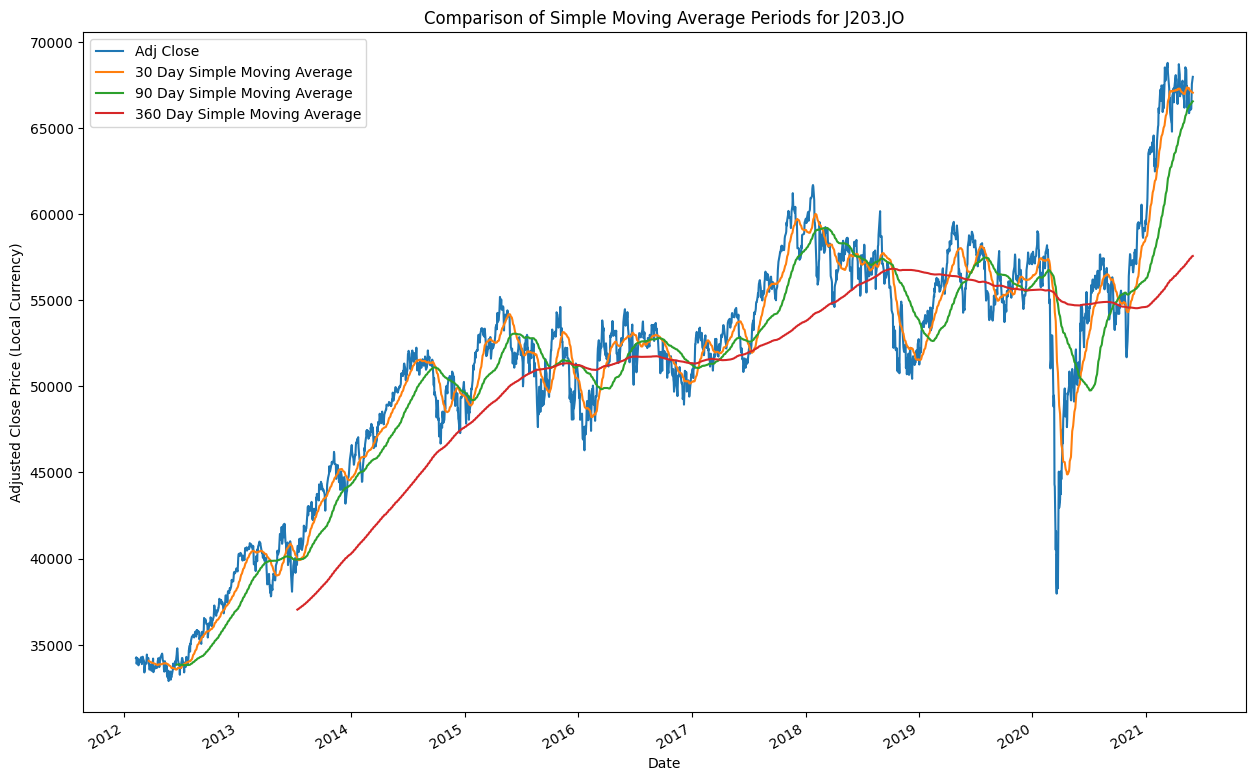

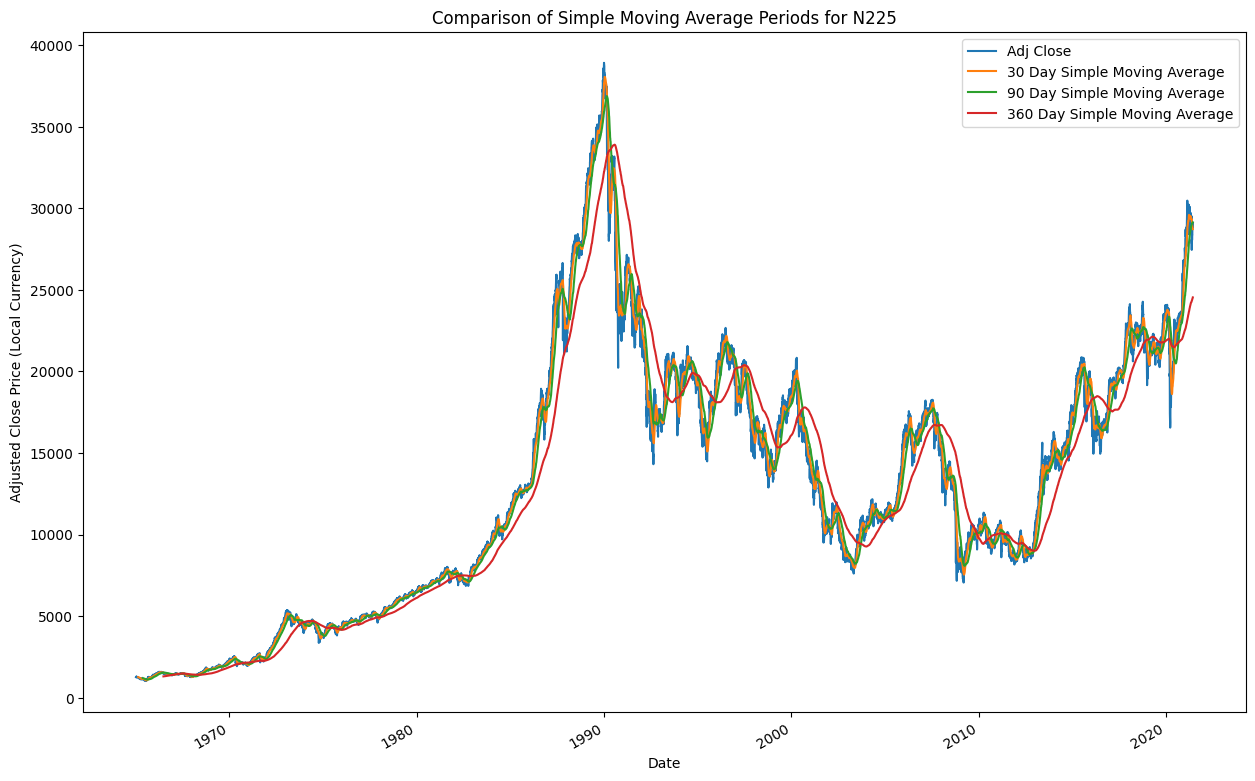

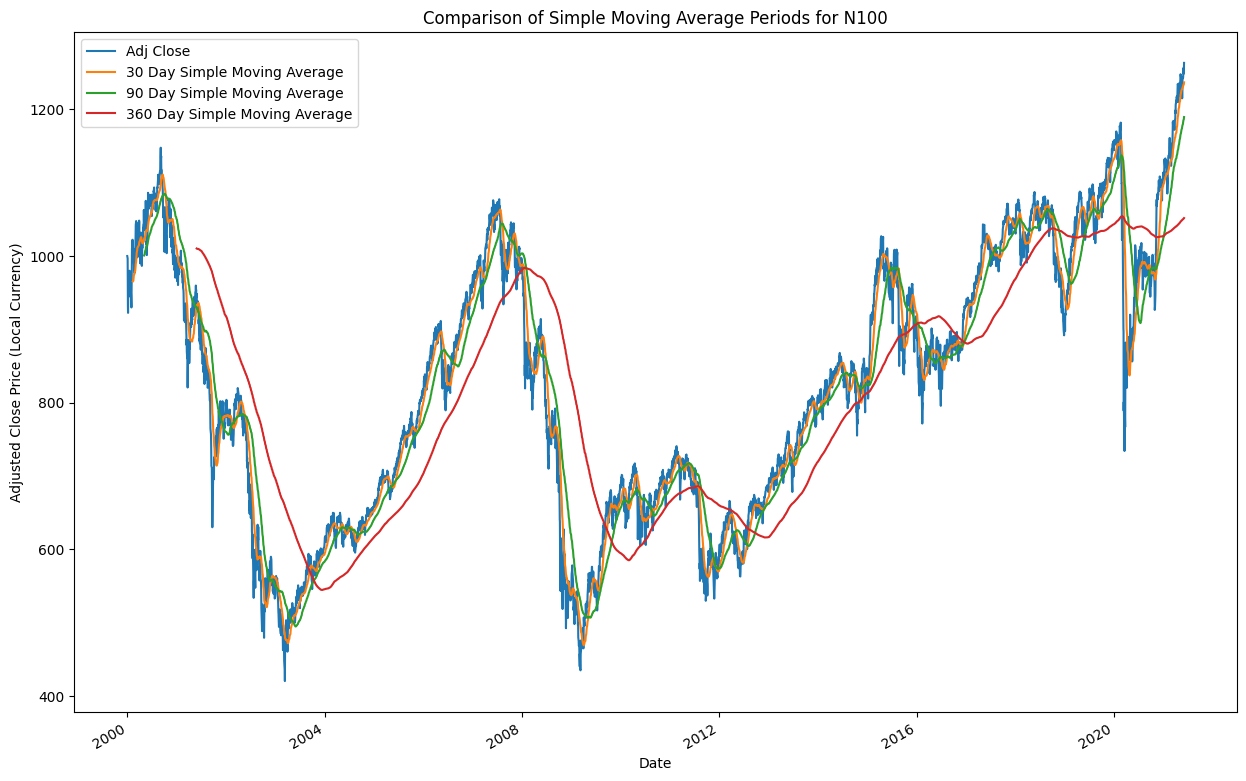

In [166]:
# Calculate simple moving averages for each index.
for index in data["Index"].unique():
    # Increasing the window size smooths the data, but reduces the accuracy.
    data_frames_per_index[index]["30 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(30).mean()
    )
    data_frames_per_index[index]["90 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(90).mean()
    )
    data_frames_per_index[index]["360 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(360).mean()
    )

# Generate a time series graph for each index.
for index in data["Index"].unique():
    data_frames_per_index[index].plot(
        x="Date",
        y=[
            "Adj Close",
            "30 Day Simple Moving Average",
            "90 Day Simple Moving Average",
            "360 Day Simple Moving Average",
        ],
        xlabel="Date",
        ylabel="Adjusted Close Price (Local Currency)",
        title=f"Comparison of Simple Moving Average Periods for {index}",
        figsize=(15, 10),
    )


### Calculate Exponential Moving Averages


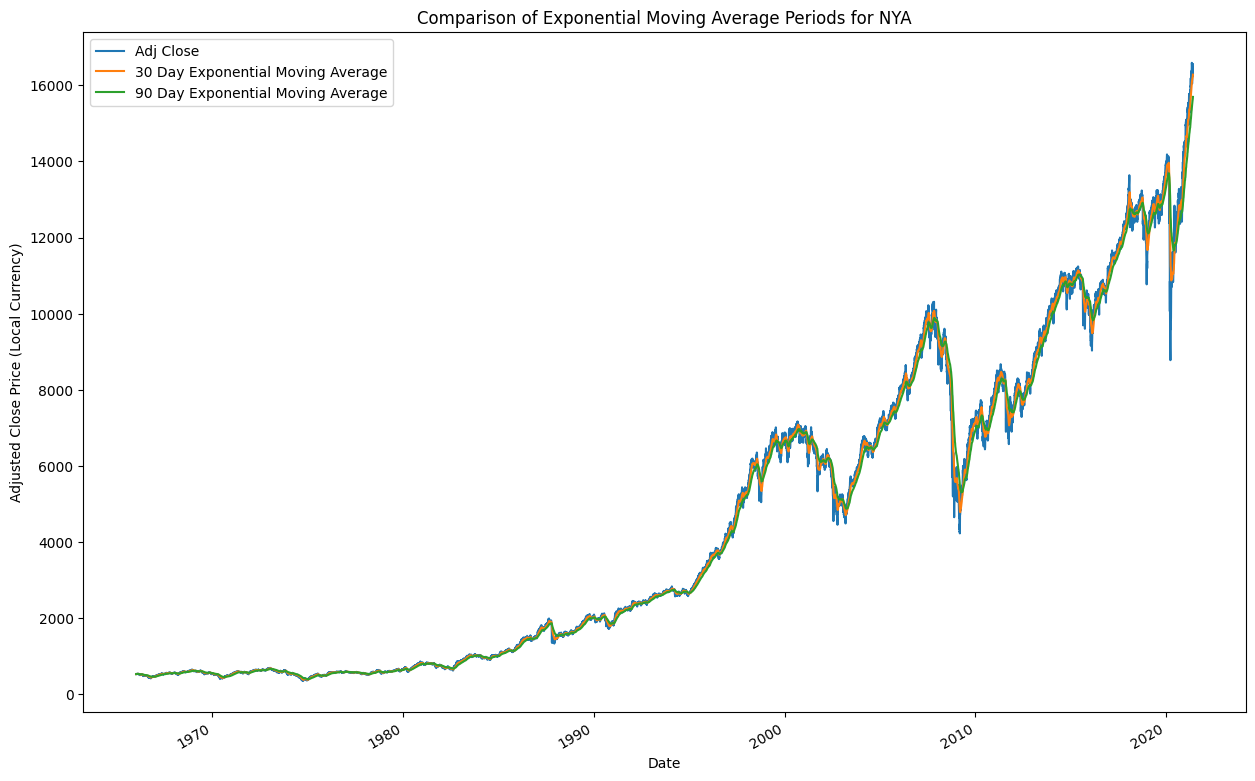

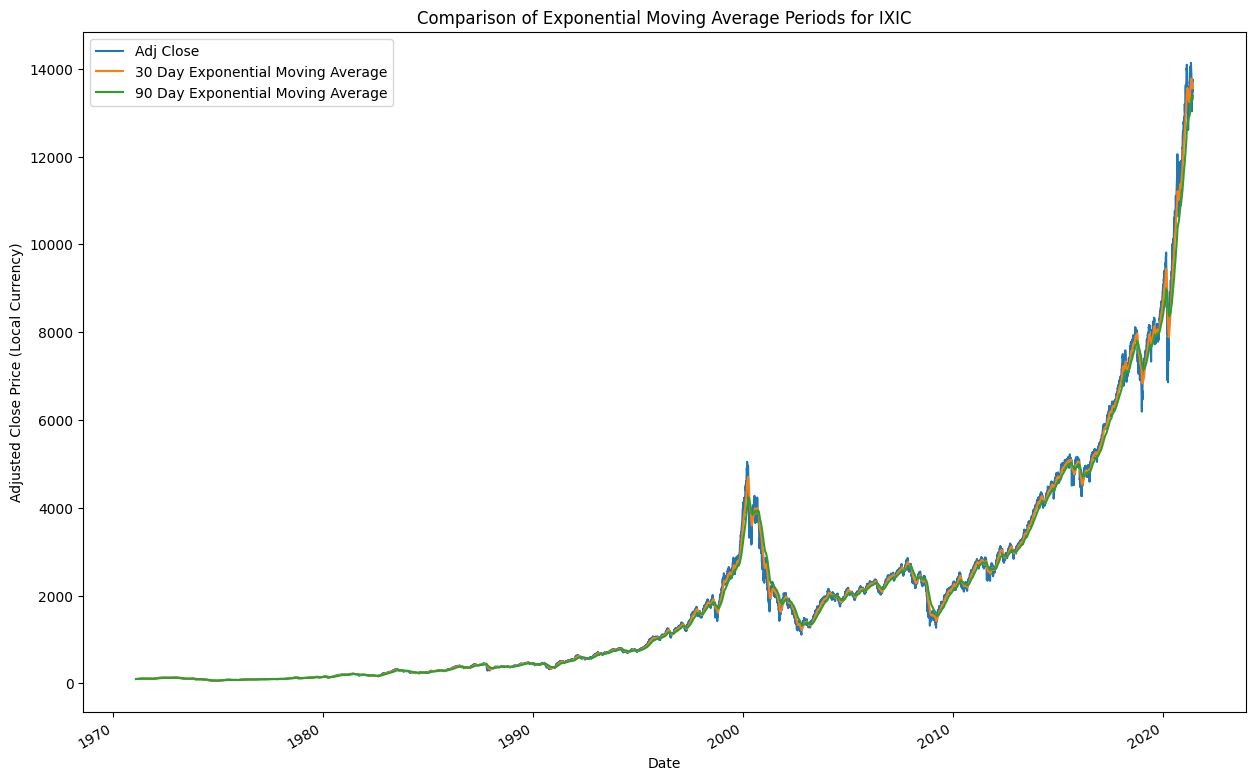

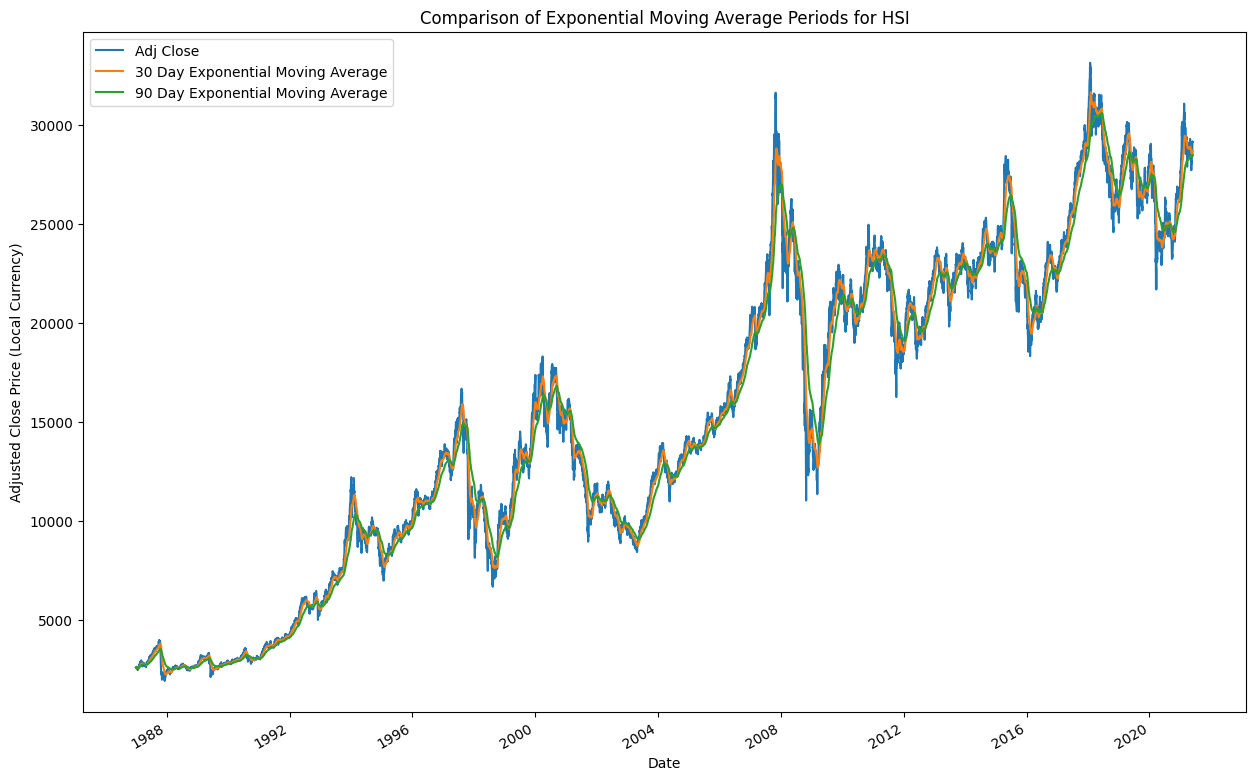

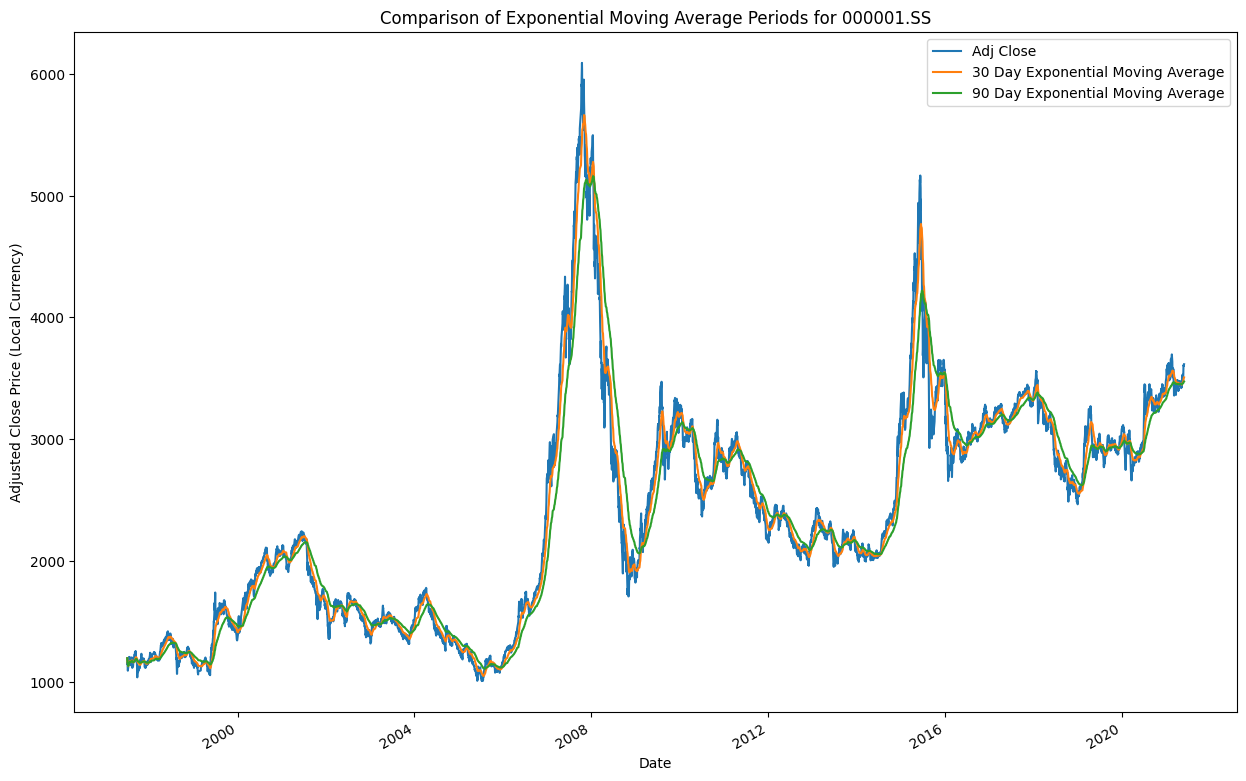

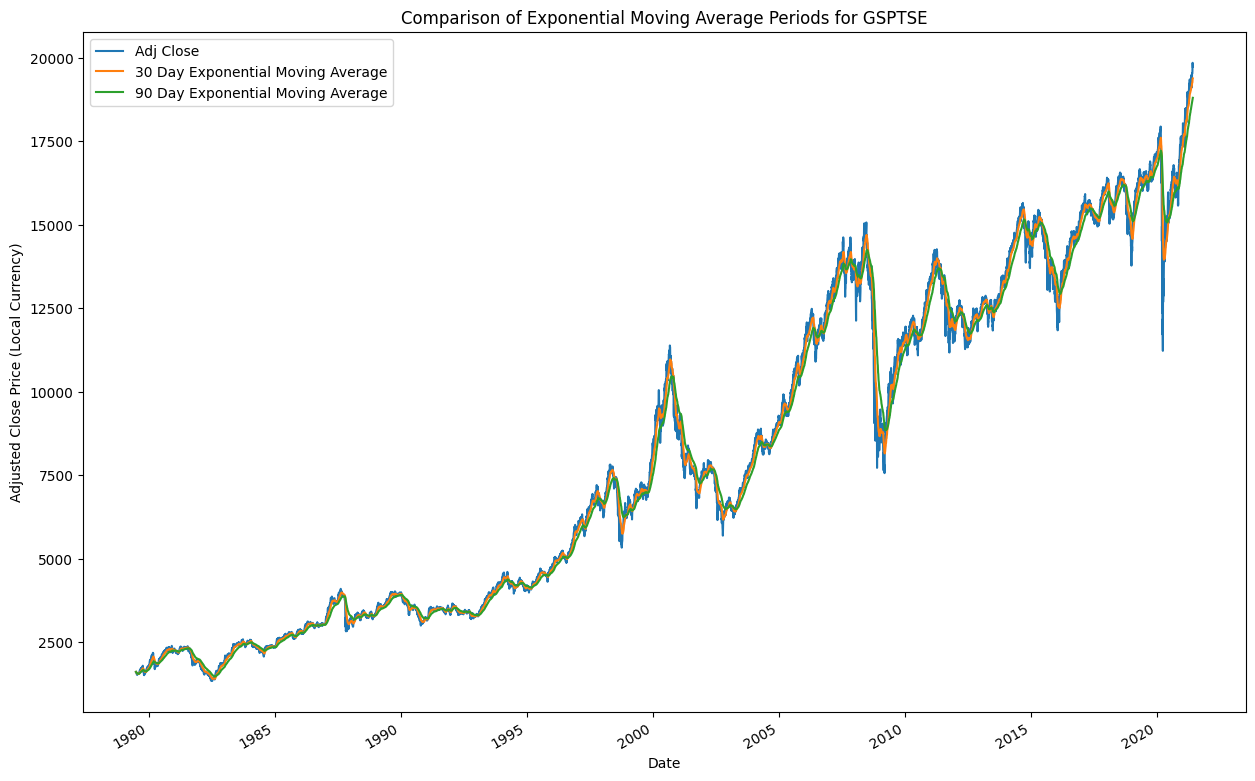

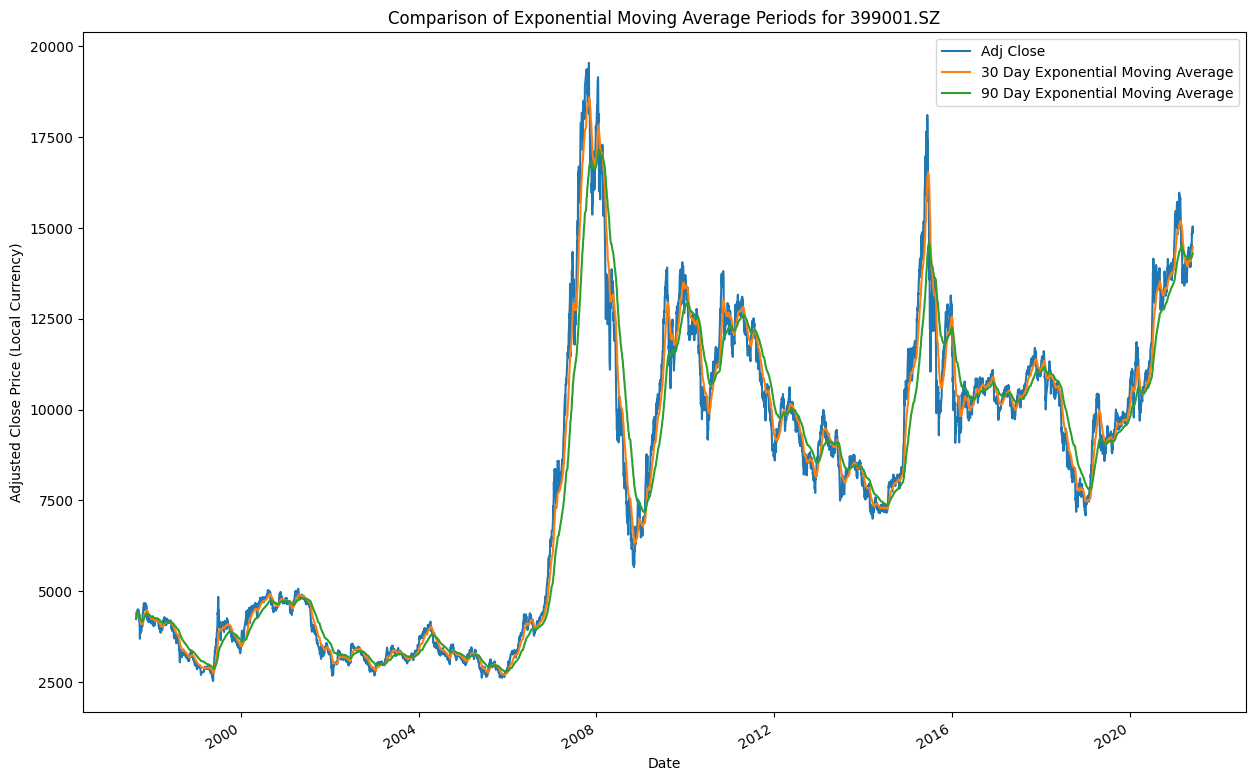

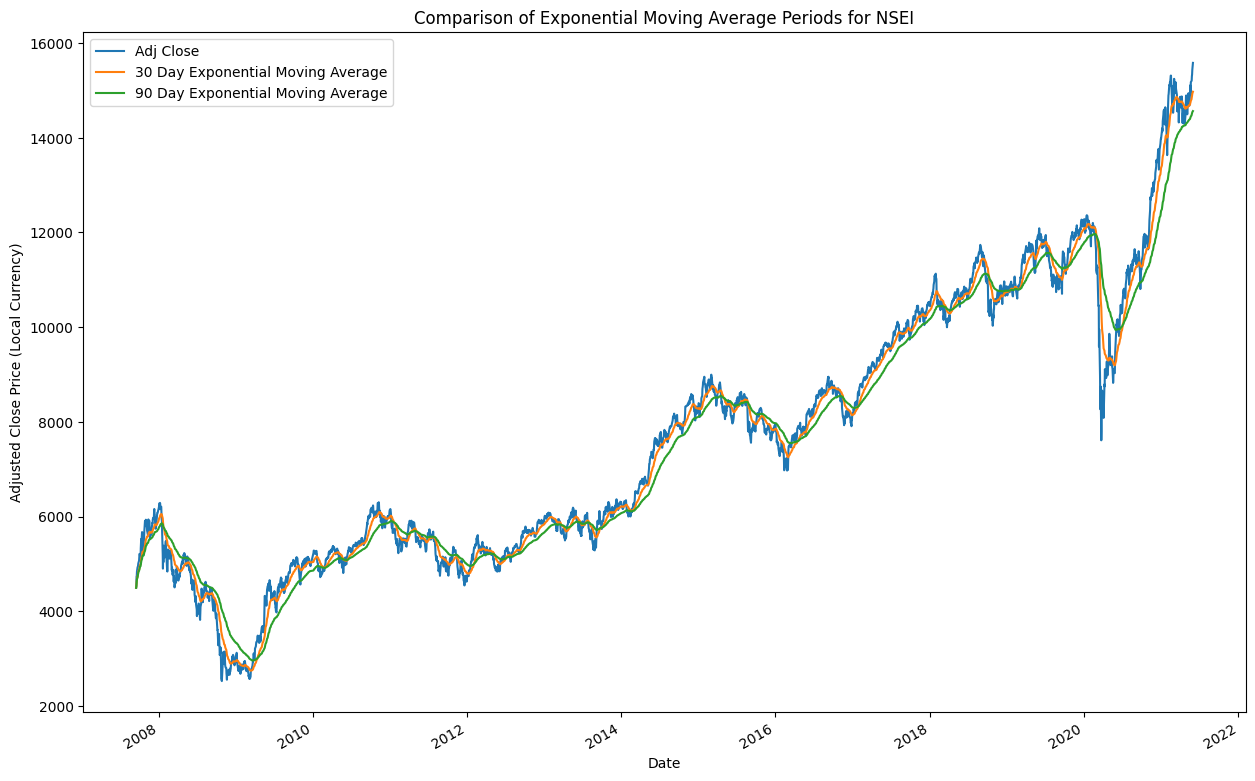

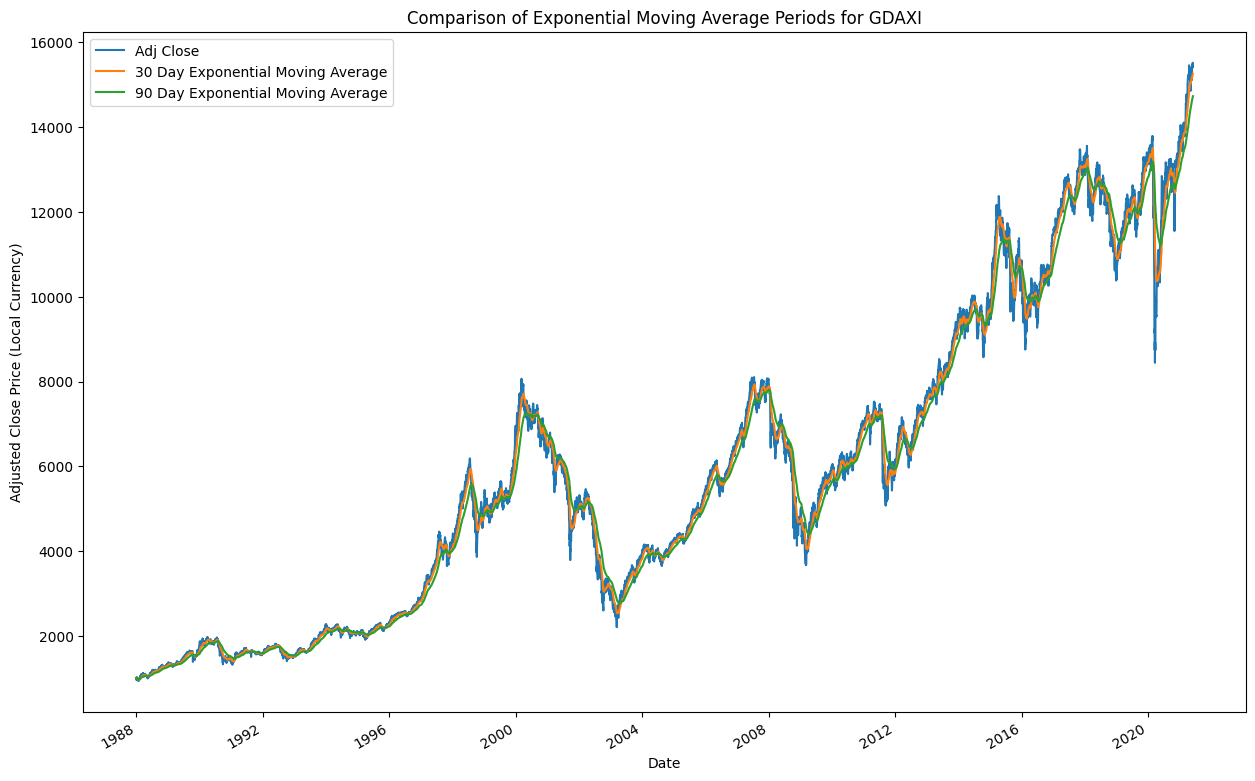

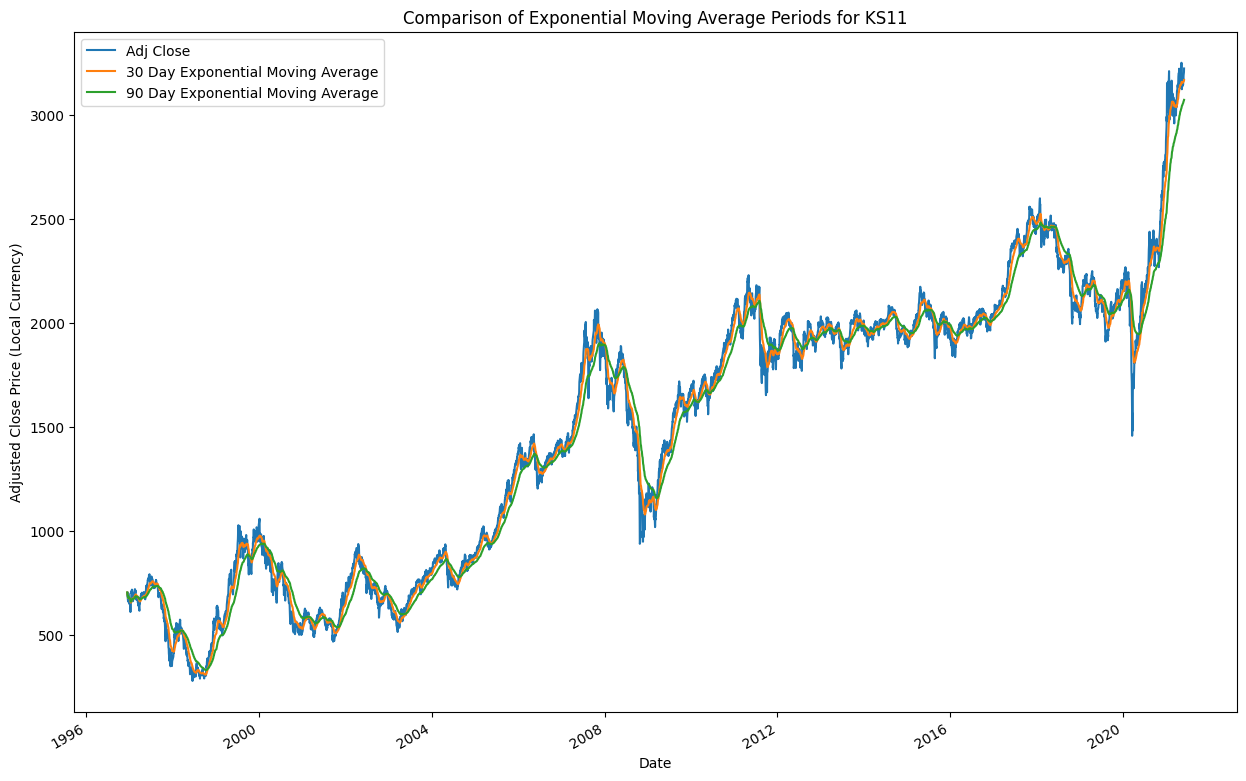

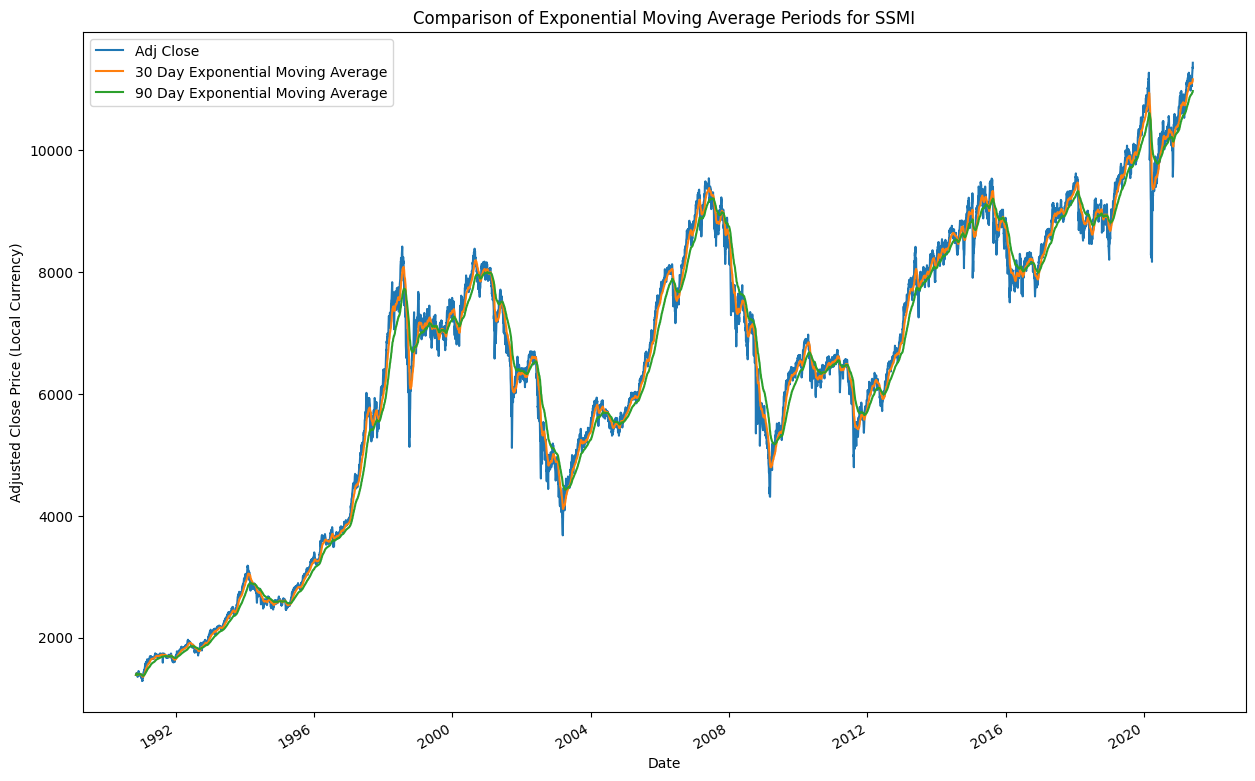

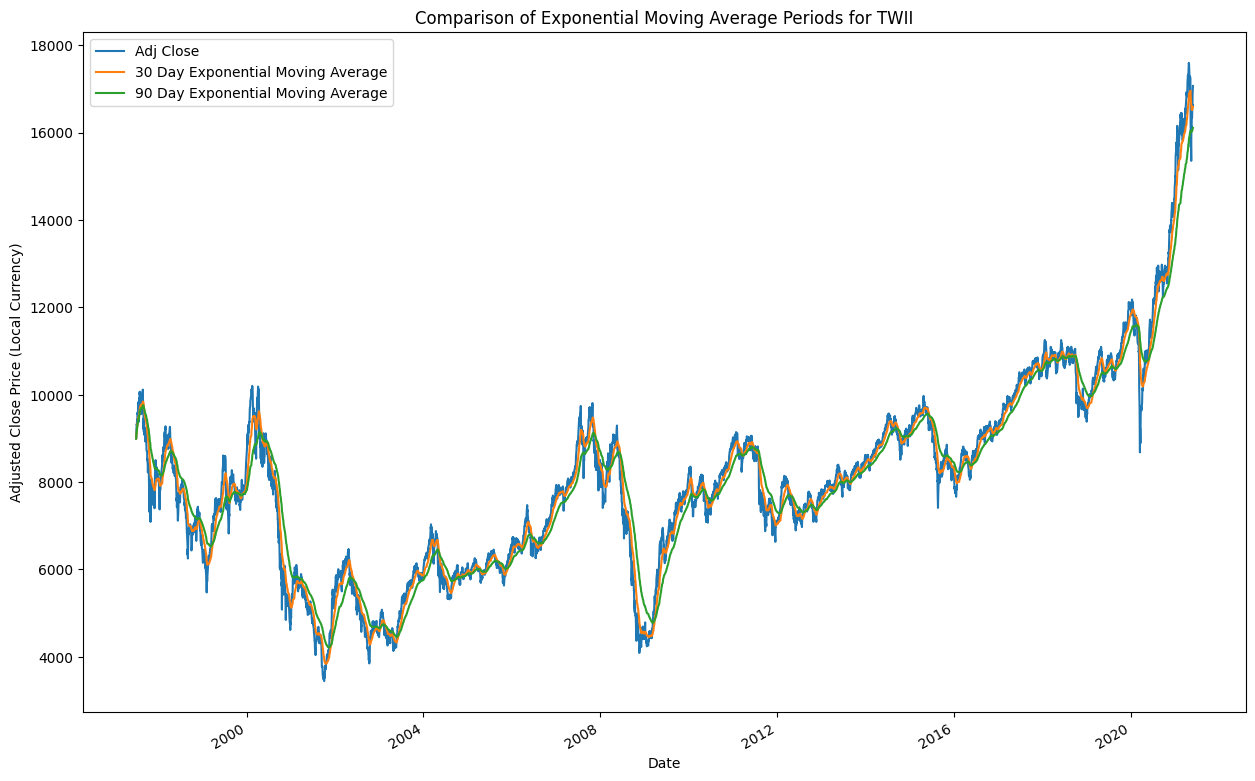

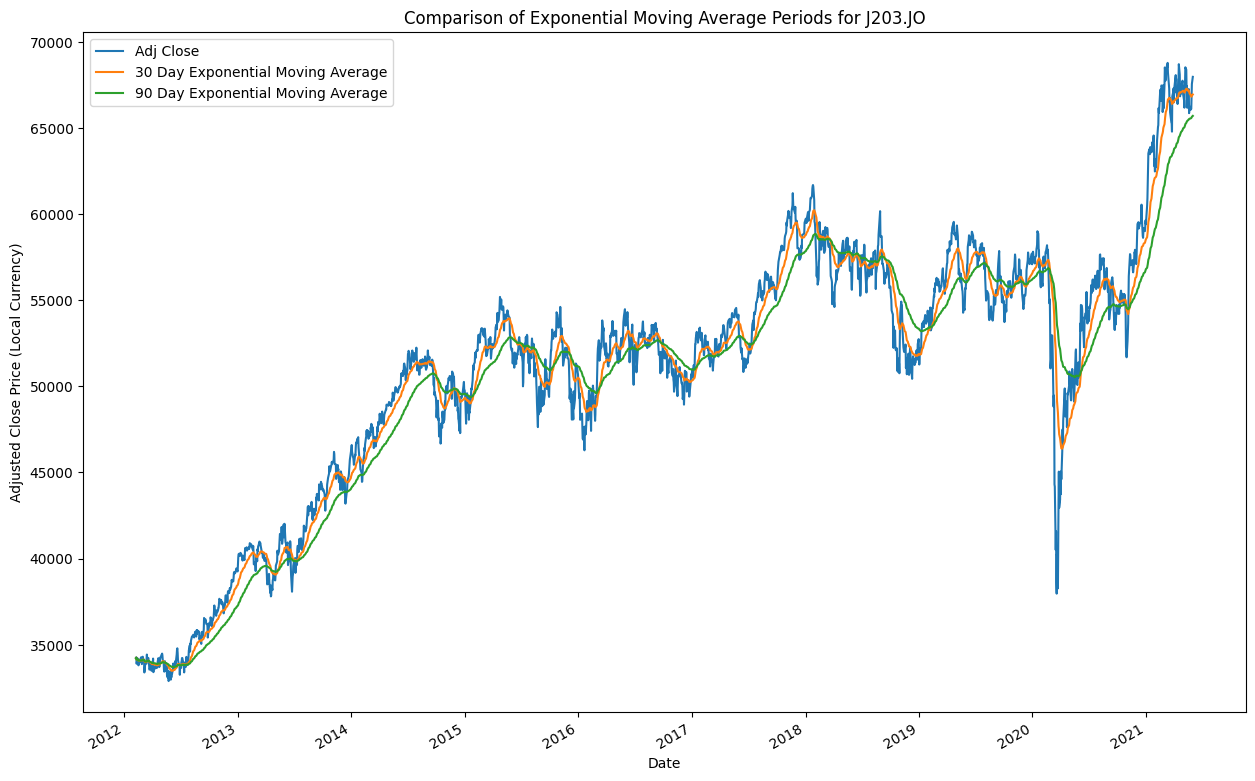

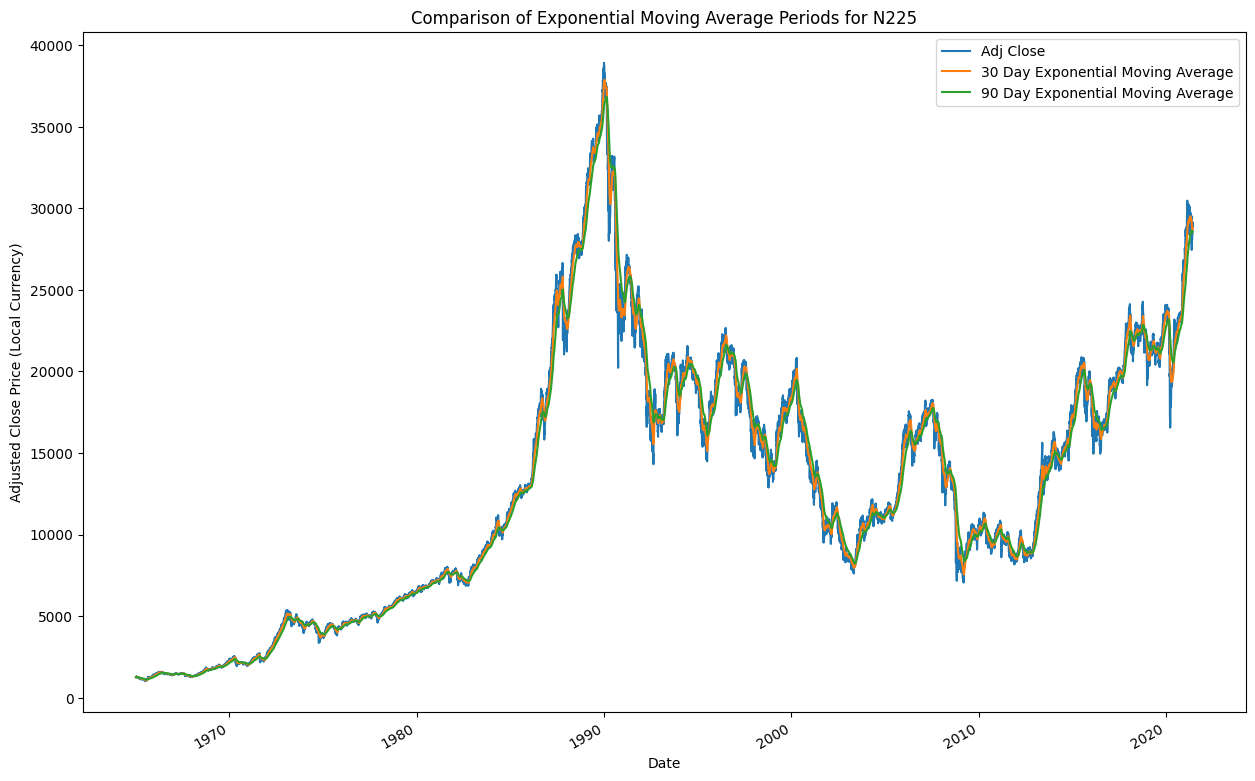

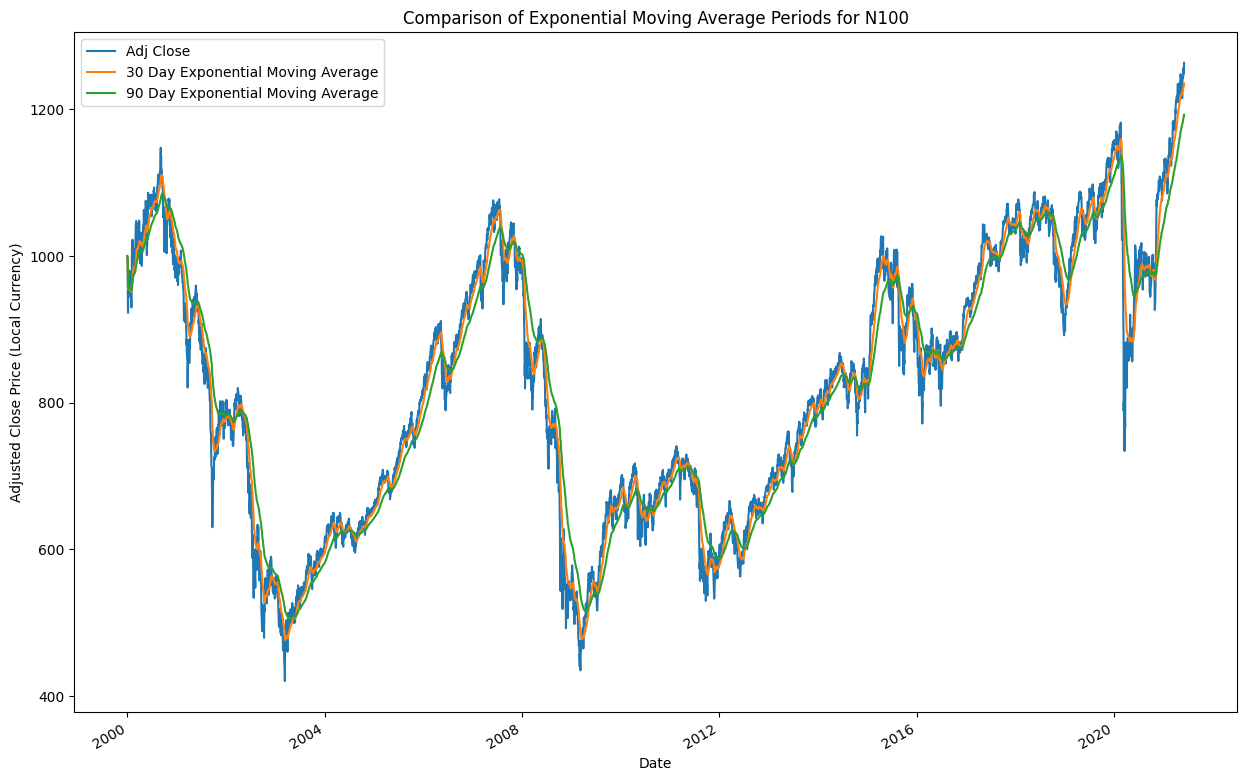

In [167]:
for index in data["Index"].unique():
    # Calculate 30 and 90 day exponential moving averages for each index.
    data_frames_per_index[index]["30 Day Exponential Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].ewm(span=30).mean()
    )
    data_frames_per_index[index]["90 Day Exponential Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].ewm(span=90).mean()
    )

# Generate a time series graph for each index.
for index in data["Index"].unique():
    data_frames_per_index[index].plot(
        x="Date",
        y=[
            "Adj Close",
            "30 Day Exponential Moving Average",
            "90 Day Exponential Moving Average",
        ],
        xlabel="Date",
        ylabel="Adjusted Close Price (Local Currency)",
        title=f"Comparison of Exponential Moving Average Periods for {index}",
        figsize=(15, 10),
    )


## Data Filtering


### Select Moving Average Strategy


<AxesSubplot: title={'center': 'Comparison of Moving Average Strategies for New York Stock Exchange (NYA) - Last 5 Years'}, xlabel='Date', ylabel='Adjusted Close Price (USD)'>

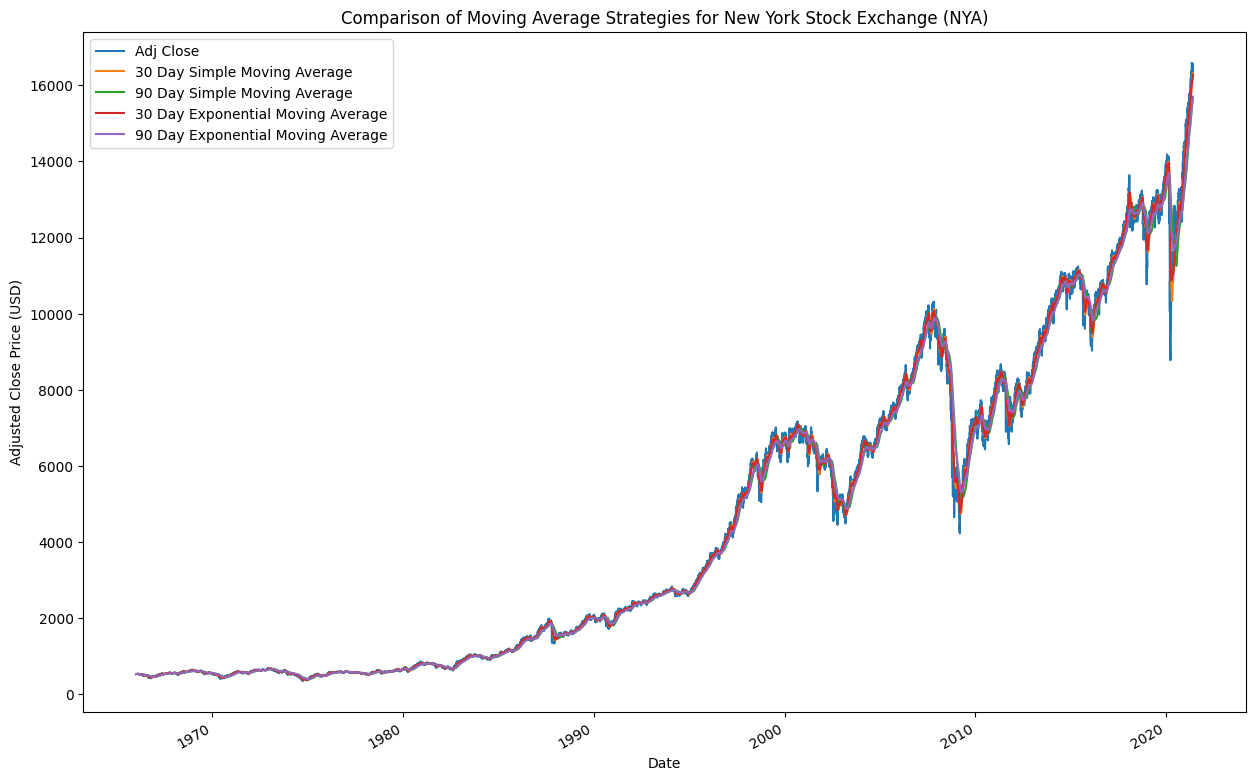

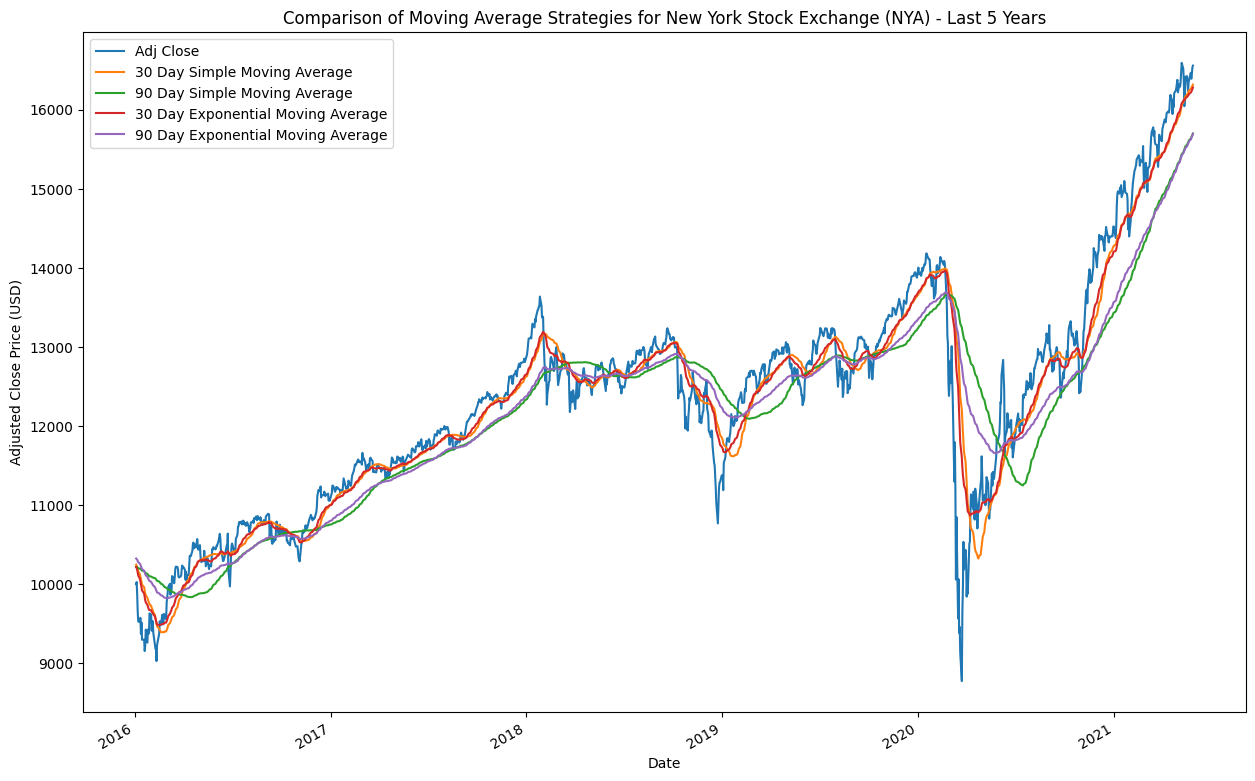

In [168]:
# Focus on the NYA data to simplify our analysis.
nya_data = data_frames_per_index["NYA"]

# Plot the NYA data to compare how the moving average strategies perform.
nya_data.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Simple Moving Average",
        "90 Day Simple Moving Average",
        "30 Day Exponential Moving Average",
        "90 Day Exponential Moving Average",
    ],
    xlabel="Date",
    ylabel="Adjusted Close Price (USD)",
    title=f"Comparison of Moving Average Strategies for New York Stock Exchange (NYA)",
    figsize=(15, 10),
)

# Plot the NYA data from the last five years to zoom into how the moving
# average strategies perform.
nya_data_last_5y = nya_data[(nya_data["Date"] > "2016-01-01")]
nya_data_last_5y.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Simple Moving Average",
        "90 Day Simple Moving Average",
        "30 Day Exponential Moving Average",
        "90 Day Exponential Moving Average",
    ],
    xlabel="Date",
    ylabel="Adjusted Close Price (USD)",
    title=f"Comparison of Moving Average Strategies for New York Stock Exchange (NYA) - Last 5 Years",
    figsize=(15, 10),
)


### Show Final Data After Preprocessing


<AxesSubplot: title={'center': 'Time Series Graph for New York Stock Exchange (NYA) - Last 5 Years'}, xlabel='Date', ylabel='Adjusted Close Price (USD)'>

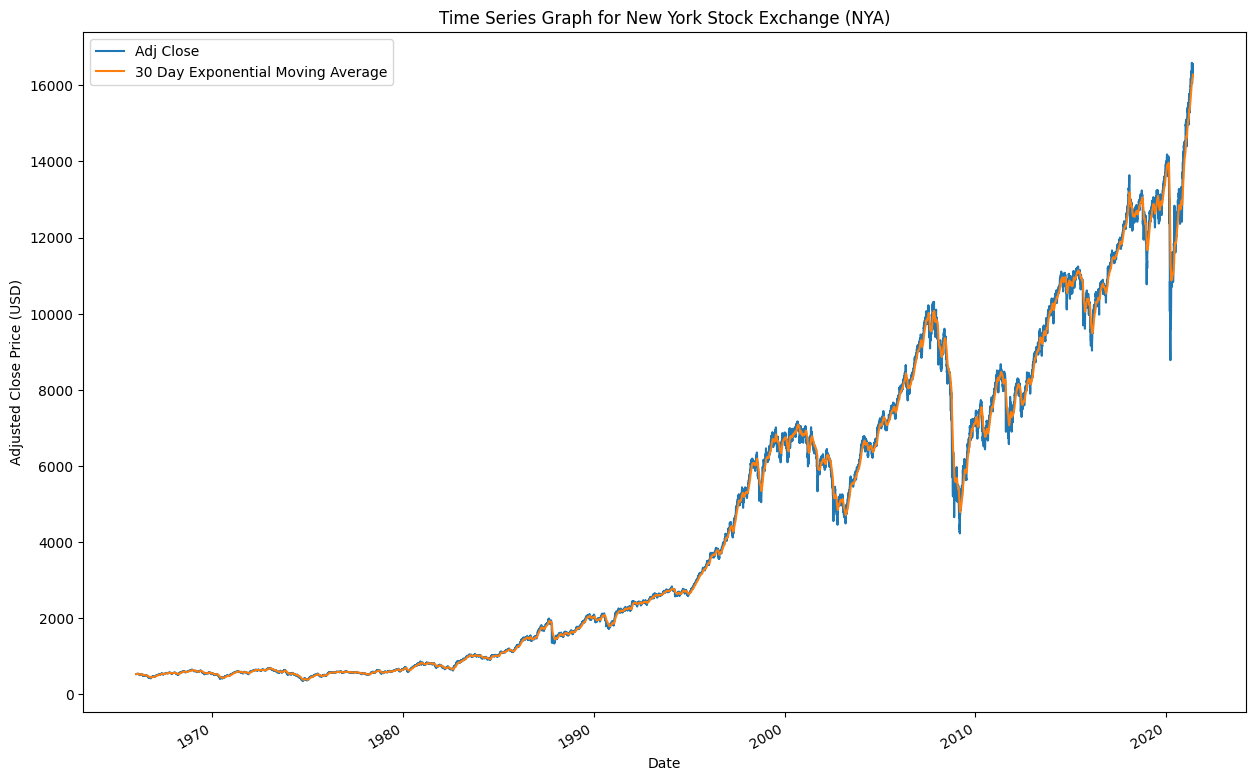

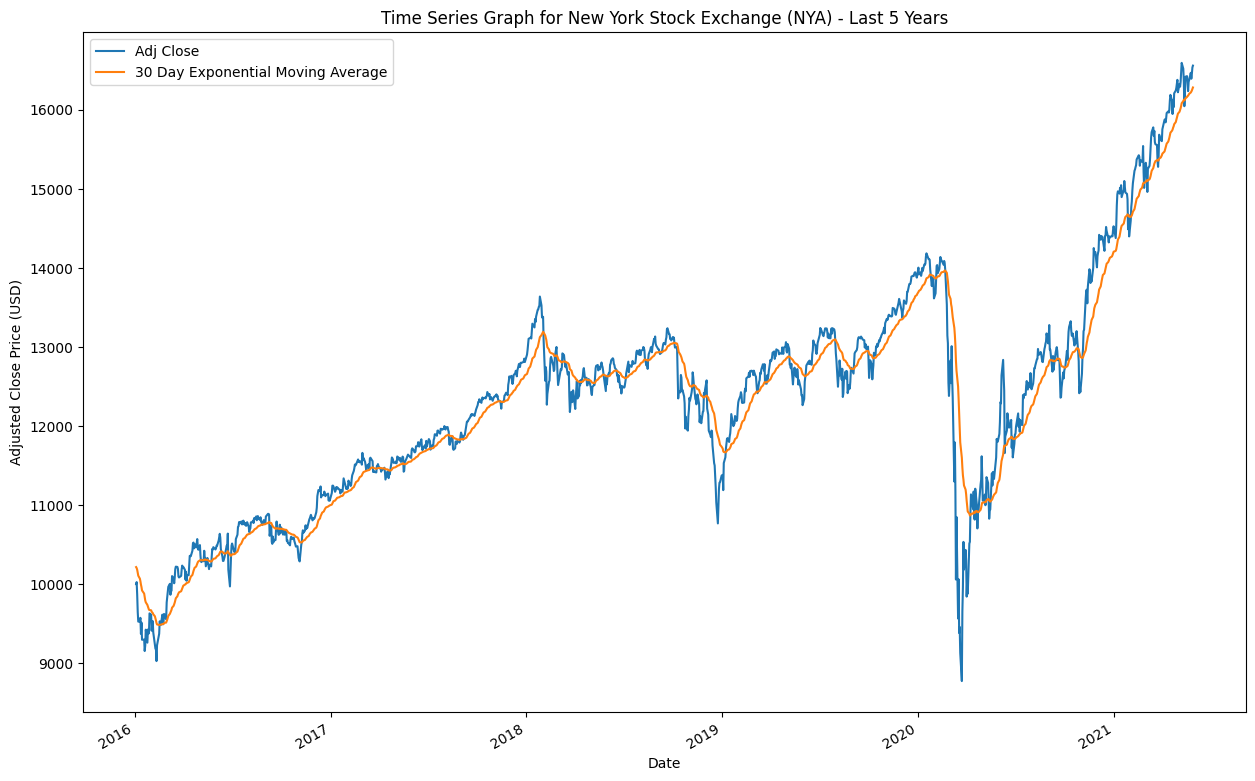

In [169]:
# Restrict analysis to focus on 30 day exponential moving average.
nya_data = nya_data[["Date", "Adj Close", "30 Day Exponential Moving Average"]]
# Plot the NYA data to show what we're working with.
nya_data.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Exponential Moving Average",
    ],
    xlabel="Date",
    ylabel="Adjusted Close Price (USD)",
    title=f"Time Series Graph for New York Stock Exchange (NYA)",
    figsize=(15, 10),
)

# Show a zoomed in view using the last five years of data.
nya_data_last_5y = nya_data[nya_data["Date"] > "2016-01-01"]
# Plot the NYA data to show what we're working with.
nya_data_last_5y.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Exponential Moving Average",
    ],
    xlabel="Date",
    ylabel="Adjusted Close Price (USD)",
    title=f"Time Series Graph for New York Stock Exchange (NYA) - Last 5 Years",
    figsize=(15, 10),
)


## Modelling


### Generate Training and Test Data Sets for NYA Index


In [170]:
predict_days = 30
nya_data["Prediction"] = nya_data["30 Day Exponential Moving Average"].shift(
    -predict_days
)
x = np.array(nya_data.drop(["Prediction"], axis=1))
x = x[:-predict_days]
y = np.array(nya_data["Prediction"])
y = y[:-predict_days]

# Generate a training and test data set for the NYA index.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)
# training_data, test_data = train_test_split(nya_data, train_size=0.8, shuffle=True)
# print("Training Data:")
# display(training_data)
# print("Test Data:")
# display(test_data)


/var/folders/qp/xjhbjb791c527d9nwvbnwz8m0000gn/T/ipykernel_16167/3036014654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nya_data["Prediction"] = nya_data["30 Day Exponential Moving Average"].shift(


### Ridge Regression


In [171]:
# Define the ridge regression model.
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

ridge_model_score = ridge_model.score(x_test, y_test)
print(ridge_model_score)


TypeError: float() argument must be a string or a real number, not 'Timestamp'

## Analysis of Results
